# <font color="#2E86C1"><b>AICE Associate 1회 모의고사</b></font>
---

##  <font color="#117A65"><b>장바구니 이탈 고객 예측</b></font>


### <font color="#5D6D7E"><b>목적</b></font>  
<b>장바구니 이탈 가능성이 높은 고객을 사전에 예측</b>하여  
마케팅 자동화 시스템에 활용할 수 있도록  
고객 특성 데이터를 기반으로 예측 모델을 구축합니다.

### <font color="#5D6D7E"><b>배경 시나리오</b></font>

온라인 쇼핑몰을 운영하는 <b>A사</b>는 최근 장바구니 이탈률이 높아짐에 따라  
매출 손실이 증가하고 있습니다. 고객이 상품을 장바구니에 담고도  
구매까지 이어지지 않는 경우가 많아, 이를 사전에 예측하고자 합니다.    
이에 따라 기업은 실제 장바구니 이탈 여부와 고객의 기본 정보를 포함한    
데이터를 수집하였으며, 다음 조건을 기반으로  <b>장바구니 이탈 여부(`cart_abandon_yn`)</b> 를 예측하는 모델을 구축하려고 합니다.

---

### 📊 <font color="#5D6D7E"><b>데이터 설명</b></font>  
<b>파일 이름: `cart_abandon.csv`</b>

| <b>컬럼명</b>             | <b>설명</b>                                      |
|--------------------------|--------------------------------------------------|
| `cart_value`             | 장바구니 금액 (USD)                              |
| `num_items`              | 장바구니에 담긴 상품 수                         |
| `device`                 | 접속 기기 (mobile, tablet, desktop)            |
| `time_on_site`           | 사이트 체류 시간 (분)                           |
| `prev_purchase`          | 기존 구매 이력 여부 (`Y`, `N`)                  |
| `country`                | 접속 국가 (US, CN, JP, Others 등)              |
| `payment_method`         | 결제 수단 (card, paypal 등)                    |
| `discount_applied`       | 할인 적용 여부 (`Y`, `N`)                       |
| `user_type`              | 사용자 유형 (guest / registered)               |
| `cart_abandon_yn`        | <mark><b>장바구니 이탈 여부 (1: 이탈, 0: 구매 완료)</b></mark> ← <b>예측 대상</b> |

---

## [문제 1] 라이브러리 임포트

🖋 상황 설명  
장바구니 이탈 여부 예측을 위해 필요한 라이브러리를 임포트하려 합니다.

🎯 목표
- pandas, numpy, seaborn, matplotlib을 임포트하세요.

📑 조건
- seaborn은 sns, matplotlib.pyplot은 plt로 별칭(alias) 지정


In [3]:
# 여기에 답안코드를 작성하세요.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### **정답코드**

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## [문제 2] 데이터 불러오기

🖋 상황 설명  
cart_abandon.csv 파일을 불러와야 합니다.

🎯 목표
- 파일을 읽어 abandon_df라는 이름의 데이터프레임에 저장하세요.

In [39]:
# 여기에 답안코드를 작성하세요.
abandon_df = pd.read_csv('datasets/cart_abandon.csv')
abandon_df

,cart_value,num_items,device,time_on_site,prev_purchase,country,payment_method,discount_applied,user_type,cart_abandon_yn
0,267.87,5,mobile,NaN,Y,JP,card,N,guest,1
1,293.92,5,tablet,8.54,Y,CN,card,N,registered,0
2,33.67,9,mobile,7.16,Y,US,paypal,N,guest,0
3,102.33,8,tablet,4.13,N,CN,card,Y,guest,0
4,348.93,6,mobile,7.59,N,Others,card,N,guest,0
...,...,...,...,...,...,...,...,...,...,...
1295,328.45,1,mobile,8.76,N,Others,bank_transfer,N,guest,1
1296,137.04,8,desktop,10.50,N,US,card,N,guest,0
1297,NaN,4,desktop,6.82,Y,US,card,Y,registered,0
1298,136.75,9,desktop,6.21,N,JP,bank_transfer,N,guest,0


##### **정답코드**

In [91]:
abandon_df = pd.read_csv('datasets/cart_abandon.csv')

## [문제 3] 데이터 확인

🖋 상황 설명   
사용자의 회원 유형(user_type)에 따라 웹사이트 체류 시간(time_on_site)이 어떻게 다른지를 분석하고자 합니다.   

🎯 목표  
- Seaborn의 boxplot()을 사용하여 시각화하고, 결과를 바탕으로 올바른 해석을 고르세요.
- 결과는 '답04' 변수에 저장하세요.

📑 조건  

 - x = user_type
 - y = time_on_site

1. registered 사용자가 guest보다 평균과 중앙값 모두 높고, 이상치도 많다.  
2. guest 사용자는 registered보다 체류 시간이 약간 더 길며, 평균과 중앙값 모두 더 높다.  
3. 두 그룹의 중앙값은 같지만, guest는 이상치가 많아 평균만 더 높다.  
4. guest는 이상치가 없고 registered는 이상치로 인해 중앙값이 낮아졌다.  



In [41]:
abandon_df.groupby('user_type')['time_on_site'].mean()

user_type
guest         8.205293
registered    7.844683
Name: time_on_site, dtype: float64

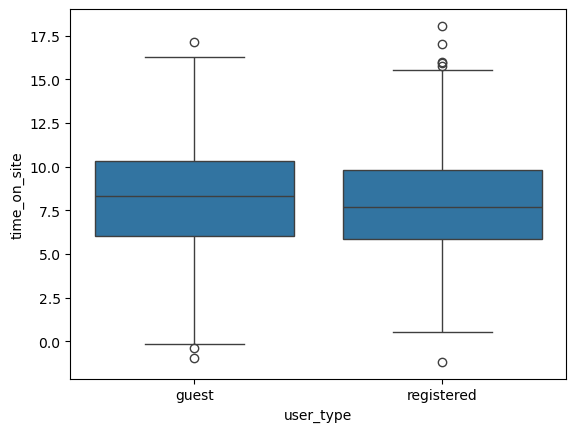

In [43]:
#여기에 답안코드를 작성하세요
sns.boxplot(abandon_df, x= 'user_type', y='time_on_site')
답04 = 2

##### **정답코드**

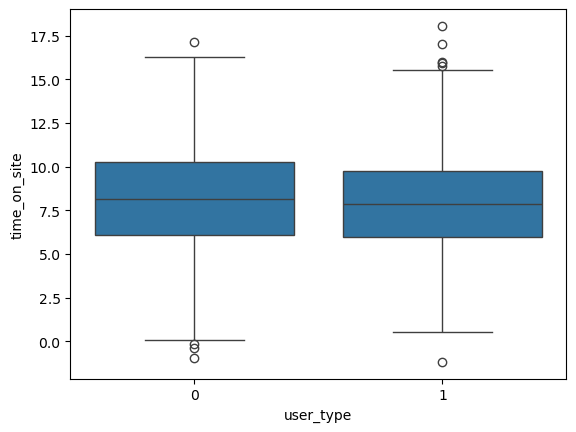

In [89]:
abandon_df.groupby('user_type')['time_on_site'].mean()
sns.boxplot(data=abandon_df, x='user_type', y='time_on_site')
답04 = 2

## [문제 4] 결측치 처리

🖋 상황 설명  
다음과 같이 결측치를 처리하고자 합니다.  
- 'time_on_site' 컬럼의 결측치를 중앙값(median)으로 채우세요.
- 'cart_value' 컬럼의 결측치를 평균(mean)으로 채우세요.

📑 조건  

- inplace = True를 이용하여 처리하세요.

In [45]:
# 여기에 답안코드를 작성하세요.
abandon_df['time_on_site'].fillna(abandon_df['time_on_site'].median(), inplace=True)
abandon_df['cart_value'].fillna(abandon_df['cart_value'].mean(), inplace=True)

C:\Users\MEDIA-CAM2\AppData\Local\Temp\ipykernel_14568\2528310432.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  abandon_df['time_on_site'].fillna(abandon_df['time_on_site'].median(), inplace=True)
C:\Users\MEDIA-CAM2\AppData\Local\Temp\ipykernel_14568\2528310432.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

##### **정답코드**

In [33]:
abandon_df['time_on_site'].fillna(abandon_df['time_on_site'].median(), inplace=True)
abandon_df['cart_value'].fillna(abandon_df['cart_value'].mean(), inplace=True)

## [문제 5] 범주형 변수 인코딩

🖋 상황 설명  
범주형 변수 컬럼을 get_dummies로 변환하세요.

🎯 목표
- drop_first=True 옵션 사용
- 'incoding_df' 변수에 처리한 데이터를 저장하세요.

다음 문제를 풀기 전에 아래의 코드를 실행하여 주세요.

In [47]:
abandon_df["prev_purchase"] = abandon_df["prev_purchase"].map({"Y": 1, "N": 0})
abandon_df["discount_applied"] = abandon_df["discount_applied"].map({"Y": 1, "N": 0})
abandon_df["user_type"] = abandon_df["user_type"].map({"registered": 1, "guest": 0})

In [49]:
cat_col = ['device', 'country', 'payment_method']

범주형 변수는 위의 cat_col을 사용하세요.

In [52]:
# 여기에 답안코드를 작성하세요.
incoding_df = pd.get_dummies(data=abandon_df, columns=cat_col, drop_first=True)

##### **정답코드**

In [47]:
incoding_df = pd.get_dummies(data=abandon_df, columns=cat_col, drop_first=True)
incoding_df

,cart_value,num_items,time_on_site,prev_purchase,discount_applied,user_type,cart_abandon_yn,device_mobile,device_tablet,country_JP,country_KR,country_Others,country_US,payment_method_card,payment_method_paypal
0,267.870000,5,8.095,1,0,0,1,1,0,1,0,0,0,1,0
1,293.920000,5,8.540,1,0,1,0,0,1,0,0,0,0,1,0
2,33.670000,9,7.160,1,0,0,0,1,0,0,0,0,1,0,1
3,102.330000,8,4.130,0,1,0,0,0,1,0,0,0,0,1,0
4,348.930000,6,7.590,0,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,328.450000,1,8.760,0,0,0,1,1,0,0,0,1,0,0,0
1296,137.040000,8,10.500,0,0,0,0,0,0,0,0,0,1,1,0
1297,262.188534,4,6.820,1,1,1,0,0,0,0,0,0,1,1,0
1298,136.750000,9,6.210,0,0,0,0,0,0,1,0,0,0,0,0


## [문제 6] 필요없는 컬럼 제거

🖋 상황 설명  
'num_items' 컬럼을 삭제합니다.

🎯 목표
- axis=1, inplace=True를 사용하세요.

In [56]:
# 여기에 답안코드를 작성하세요.
incoding_df.drop(columns='num_items', axis=1, inplace=True)

KeyError: "['num_items'] not found in axis"

##### **정답코드**

In [53]:
incoding_df.drop(columns=['num_items'], axis=1, inplace=True)

## [문제 7] 이상치 제거

🖋 상황 설명  
'time_on_site'는 사이트 체류 시간을 나타내는 변수입니다.  
해당하는 값을 보면, 음수로 이루어진 값이 존재합니다.

🎯 목표
- 'time_on_site'변수에서 0 미만의 데이터들은 삭제처리하세요.
- 삭제처리된 데이터는 filtering_df로 저장하고, reset_index()를 이용하여 index를 초기화하세요.
- reset_index()에서는 drop=True, inplace=True를 사용하세요.

In [60]:
# 여기에 답안코드를 작성하세요.
filtering_df = incoding_df.drop(incoding_df[incoding_df['time_on_site'] < 0].index, axis=0)
filtering_df.reset_index(drop=True, inplace=True)
filtering_df

,cart_value,time_on_site,prev_purchase,discount_applied,user_type,cart_abandon_yn,device_mobile,device_tablet,country_JP,country_KR,country_Others,country_US,payment_method_card,payment_method_paypal
0,267.870000,8.095,1,0,0,1,True,False,True,False,False,False,True,False
1,293.920000,8.540,1,0,1,0,False,True,False,False,False,False,True,False
2,33.670000,7.160,1,0,0,0,True,False,False,False,False,True,False,True
3,102.330000,4.130,0,1,0,0,False,True,False,False,False,False,True,False
4,348.930000,7.590,0,0,0,0,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,328.450000,8.760,0,0,0,1,True,False,False,False,True,False,False,False
1292,137.040000,10.500,0,0,0,0,False,False,False,False,False,True,True,False
1293,262.188534,6.820,1,1,1,0,False,False,False,False,False,True,True,False
1294,136.750000,6.210,0,0,0,0,False,False,True,False,False,False,False,False


##### **정답코드**

In [59]:
filtering_df = incoding_df.drop(incoding_df[incoding_df['time_on_site'] < 0].index, axis=0)
filtering_df.reset_index(drop=True, inplace=True)
filtering_df

,cart_value,time_on_site,prev_purchase,discount_applied,user_type,cart_abandon_yn,device_mobile,device_tablet,country_JP,country_KR,country_Others,country_US,payment_method_card,payment_method_paypal
0,267.870000,8.095,1,0,0,1,1,0,1,0,0,0,1,0
1,293.920000,8.540,1,0,1,0,0,1,0,0,0,0,1,0
2,33.670000,7.160,1,0,0,0,1,0,0,0,0,1,0,1
3,102.330000,4.130,0,1,0,0,0,1,0,0,0,0,1,0
4,348.930000,7.590,0,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,328.450000,8.760,0,0,0,1,1,0,0,0,1,0,0,0
1292,137.040000,10.500,0,0,0,0,0,0,0,0,0,1,1,0
1293,262.188534,6.820,1,1,1,0,0,0,0,0,0,1,1,0
1294,136.750000,6.210,0,0,0,0,0,0,1,0,0,0,0,0


## [문제 8] feature/target 분리

🖋 상황 설명  
모델 학습을 위해 feature(X)와 target(y)을 분리하고자 합니다.  

🎯 목표
- X = 'cart_abandon_yn'제외 전부
- y = 'cart_abandon_yn'

In [142]:
# 여기에 답안코드를 작성하세요.
X = filtering_df.drop(columns='cart_abandon_yn',axis=1)
y = filtering_df['cart_abandon_yn']

##### **정답코드**

In [145]:
X = filtering_df.drop(['cart_abandon_yn'],axis=1)
y = filtering_df['cart_abandon_yn']

## [문제 9] train/test 데이터 분리

🖋 상황 설명  
모델 학습과 평가를 위해 분리하려고 합니다.  

🎯 목표
- 데이터셋을 분리하기 위해 train_test_split을 import하세요.
- 훈련 데이터 셋 = X_train, y_train
- 검증 데이터 셋 = X_valid, y_valid
- random_state=42
- 훈련 데이터셋과 검증 데이터셋의 비율은 8:2
- y데이터를 훈련과 검증 데이터셋으로 균등하게 분리하기 위해 stratify옵션을 사용하세요.

In [148]:
# 여기에 답안코드를 작성하세요.
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

##### **정답코드**

In [151]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## [문제 10] 데이터 표준화

🖋 상황 설명  
StandardScaler를 이용하여 X_train과 X_valid를 표준화합니다.

🎯 목표
- StandardScaler 적용
- X_train은 fit_tranform을 이용하여 X_train 변수에 저장
- X_valid는 transform을 이용하여 X_test의 변수에 저장
  
⚙ 주어진 코드

In [154]:
from sklearn.preprocessing import StandardScaler

In [156]:
# 여기에 답안코드를 작성하세요.
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_valid)

##### **정답코드**

In [79]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_valid)

## [문제 11] 랜덤포레스트 분류 모델 학습

🖋 상황 설명  
RandomForestClassifier를 학습합니다.

🎯 목표
- 랜덤포레스트모델을 rfc변수에 저장하세요.
- n_estimators=100, max_depth=7, random_state=42
- 훈련은 스케일링 처리된 데이터를 사용해 주세요.

⚙ 주어진 코드

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
# 여기에 답안코드를 작성하세요.
rfc = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)

rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, random_state=42)

##### **정답코드**

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)

rfc.fit(X_train,y_train)

## [문제 12] XGBoost 분류 모델 학습

🖋 상황 설명  
XGBClassifier를 학습합니다.

🎯 목표
- XGBoost모델을 xgbc변수에 저장하세요.
- n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42
- 훈련은 스케일링 처리된 데이터를 사용하여 주세요.

⚙ 주어진 코드

In [78]:
from xgboost import XGBClassifier

In [82]:
# 여기에 답안코드를 작성하세요.
xgbc = XGBClassifier(n_estimator = 100, max_depth=5, learning_rate = 0.1, random_state = 42)
xgbc.fit(X_train, y_train)

C:\Users\MEDIA-CAM2\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:06:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimator=100,
              n_estimators=None, n_jobs=None, ...)

##### **정답코드**

In [ ]:
xgbc = XGBClassifier(n_estimators = 100, max_depth = 5, learning_rate = 0.1, random_state = 42)
xgbc.fit(X_train, y_train)

## [문제 13] 모델 성능 비교 (accuracy, f1)

🖋 상황 설명  
앞서 훈련된 데이터들을 test데이터를 이용하여 예측을 진행합니다. 
훈련된 모델 성능을 accuracy와 f1 score로 비교합니다.

🎯 목표
- randomforest의 predict를 이용하여 검증 데이터를 예측하고, 예측된 데이터는 rfc_predict변수에 저장하여 주세요.
- xgboost의 predict를 이용하여 검증 데이터를 예측하고, 예측된 데이터는 xgbc_predict변수에 저장하여 주세요.
- accuracy_score, f1_score 사용하여 두 모델의 acc와 f1-score를 출력하여 주세요.

⚙ 주어진 코드

In [88]:
from sklearn.metrics import accuracy_score, f1_score

In [94]:
# 여기에 답안코드를 작성하세요.
rfc_predict = rfc.predict(X_test)
xgbc_predict = xgbc.predict(X_test)

print('rfc accuracy ', accuracy_score(y_valid, rfc_predict))
print('rfc f1-score ', f1_score(y_valid, rfc_predict))

print('xgbc accracry ', accuracy_score(y_valid, xgbc_predict))
print('xgbc f1-score ', f1_score(y_valid, xgbc_predict))

rfc accuracy  0.6653846153846154
rfc f1-score  0.02247191011235955
xgbc accracry  0.6384615384615384
xgbc f1-score  0.17543859649122806


##### **정답코드**

In [ ]:
rfc_predict = rfc.predict(X_test)
xgbc_predict = xgbc.predict(X_test)

print('rfc accuracy ', accuracy_score(y_valid, rfc_predict))
print('rfc f1-score ', f1_score(y_valid, rfc_predict))

print('xgbc accuracy ', accuracy_score(y_valid, xgbc_predict))
print('xgbc f1-score ', f1_score(y_valid, xgbc_predict))

## [문제 14] 딥러닝 모델 설계 및 학습

🖋 상황 설명
딥러닝 모델을 설계하고 학습합니다.

🎯 목표
- Dense(64, relu) → Dense(32, relu) → Dense(2, softmax)
- optimizer: adam
- loss: categorical_crossentropy
- metric: accuracy
- epochs=50, batch_size=128

⚙ 주어진 코드

In [160]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

tf.random.set_seed(42)
y_train = to_categorical(y_train, num_classes=2)
y_valid = to_categorical(y_valid, num_classes=2)

In [171]:
# 여기에 답안코드를 작성하세요.
model = Sequential()
model.add(Dense(64, activation= 'relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size = 128,
          validation_data = (X_test, y_valid))

Epoch 1/50


C:\Users\MEDIA-CAM2\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.5143 - loss: 0.7034 - val_accuracy: 0.6077 - val_loss: 0.6808
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6444 - loss: 0.6508 - val_accuracy: 0.6538 - val_loss: 0.6695
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6670 - loss: 0.6383 - val_accuracy: 0.6462 - val_loss: 0.6687
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6651 - loss: 0.6328 - val_accuracy: 0.6538 - val_loss: 0.6684
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6688 - loss: 0.6287 - val_accuracy: 0.6500 - val_loss: 0.6681
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6700 - loss: 0.6257 - val_accuracy: 0.6500 - val_loss: 0.6679
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6696 - loss: 0.6229 - val_accuracy: 0.6538 - val_loss: 0.6681
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6748 - loss: 0.6205 - val_accuracy: 0.6577 - val_loss: 0.6684
Epoch 9/50


##### **정답코드**

In [461]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax')) 

model.compile(optimizer='adam',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=128,
          validation_data=(X_valid, y_valid)) 

Epoch 1/50


C:\Users\User\AppData\Local\Programs\Orange\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6005 - loss: 0.6637 - val_accuracy: 0.6692 - val_loss: 12.6917
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6728 - loss: 0.6292 - val_accuracy: 0.6692 - val_loss: 10.2338
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6687 - loss: 0.6210 - val_accuracy: 0.6692 - val_loss: 6.5888
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6747 - loss: 0.6177 - val_accuracy: 0.6692 - val_loss: 4.9904
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6827 - loss: 0.6147 - val_accuracy: 0.6692 - val_loss: 4.6898
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6849 - loss: 0.6112 - val_accuracy: 0.6692 - val_loss: 4.3398
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6861 - loss: 0.6082 - val_accuracy: 0.6692 - val_loss: 3.5822
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6883 - loss: 0.6056 - val_accuracy: 0.6692 - val_loss: 2.7766
Epoch 9/50
9/9 ━